In [4]:
import sys
sys.path.append('../')

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchgeometry as tgm
from skimage.transform import SimilarityTransform

import mtcnn
from mtcnn.deploy.align import align_multi
import insightface

In [7]:
# First we create pnet, rnet, onet, and load weights from caffe model.
pnet, rnet, onet = mtcnn.get_net_caffe('mtcnn/weights')

# Then we create a detector
detector = mtcnn.FaceDetector(pnet, rnet, onet, device='cpu')

embedder = insightface.iresnet100(pretrained=True)
embedder.eval()
print()

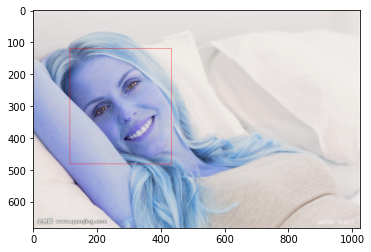

In [9]:
# Then we can detect faces from image
img_p = '/home/vladimir/Desktop/GIT/FaceDetector/tests/asset/images/roate.jpg'
img_tensor = detector._preprocess(img_p)
boxes, landmarks = detector.detect(img_tensor)

# Then we draw bounding boxes and landmarks on image
image = cv2.imread(img_p)
image = mtcnn.utils.draw.draw_boxes2(image, boxes)
image = mtcnn.utils.draw.batch_draw_landmarks(image, landmarks)

plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 512])
tensor([-0.1347, -1.5193, -0.0840, -1.4575,  0.4321])


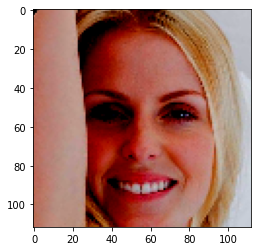

In [11]:
# Align all detected faces to reference points
outp = align_multi(img_tensor, landmarks, crop_size=(112, 112))

with torch.no_grad():
    features = embedder(outp)
print(features.shape)
print(features[0,:5])

# look at the aligned face
plt.imshow(outp[0].permute(1,2,0))

In [13]:
def get_embeddings(img_path, detector, embedder):
    """Align muti-faces in a image
    
    Args:
        @img_path: str, path to the image
        @detector: mtcnn faces detecor
        @embedder: faces embedder

    Returns:
    ----------
        @features: torch.Tensor [N,512], features of all detected faces
    """
    
    img_tensor = detector._preprocess(img_path)
    boxes, landmarks = detector.detect(img_tensor)
    outp = align_multi(img_tensor, landmarks, crop_size=(112, 112))

    with torch.no_grad():
        features = embedder(outp)
    return features

img_path = '/home/vladimir/Desktop/GIT/FaceDetector/tests/asset/images/roate.jpg'
features = get_embeddings(img_path, detector, embedder)
print(features.shape)
print(features[0,:5])

torch.Size([1, 512])
tensor([-0.1347, -1.5193, -0.0840, -1.4575,  0.4321])
